In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

2024-04-02 13:21:42.963388: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 13:21:42.963534: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 13:21:43.135055: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print(tf.__version__)

2.15.0


In [4]:
df = pd.read_csv(r"/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df=df.dropna()
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
#print unique values for categorical variables
for col in df.columns:
    if df[col].dtype not in ["int64","float64"]:
        print(f"Unique values for {col} => {df[col].unique()}")

Unique values for gender => ['Male' 'Female' 'Other']
Unique values for ever_married => ['Yes' 'No']
Unique values for work_type => ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values for Residence_type => ['Urban' 'Rural']
Unique values for smoking_status => ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [10]:
#convert all categoric to numeric
df_filtered=df.drop(columns=['id'])
df_one_hot_encode=pd.get_dummies(df_filtered)

In [11]:
df_one_hot_encode

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,True,False,False,True,...,False,False,False,True,True,False,True,False,False,False
5106,81.0,0,0,125.20,40.0,0,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,35.0,0,0,82.99,30.6,0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.6,0,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


In [12]:
df_one_hot_encode=df_one_hot_encode.astype(int)
df_one_hot_encode

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80,0,1,105,32,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171,34,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79,1,0,174,24,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81,0,0,186,29,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13,0,0,103,18,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0
5106,81,0,0,125,40,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35,0,0,82,30,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51,0,0,166,25,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [13]:
df_one_hot_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             4909 non-null   int64
 1   hypertension                    4909 non-null   int64
 2   heart_disease                   4909 non-null   int64
 3   avg_glucose_level               4909 non-null   int64
 4   bmi                             4909 non-null   int64
 5   stroke                          4909 non-null   int64
 6   gender_Female                   4909 non-null   int64
 7   gender_Male                     4909 non-null   int64
 8   gender_Other                    4909 non-null   int64
 9   ever_married_No                 4909 non-null   int64
 10  ever_married_Yes                4909 non-null   int64
 11  work_type_Govt_job              4909 non-null   int64
 12  work_type_Never_worked          4909 non-null   int64
 13  work_typ

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,4909.0,37064.313506,20995.098457,77.00,18605.00,37608.00,55220.00,72940.00
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


In [15]:
X=df_one_hot_encode.drop(columns=['stroke'])
y=df_one_hot_encode['stroke']


In [16]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,80,0,1,105,32,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171,34,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79,1,0,174,24,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5,81,0,0,186,29,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [17]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.shape,X_test.shape

((3927, 21), (982, 21))

In [20]:
y_train.shape,y_test.shape

((3927,), (982,))

# Training the Model

In [21]:
model_tf_1 = tf.keras.Sequential(
[
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [22]:
model_tf_1.compile(
        metrics=["accuracy"],
        loss= tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam()
)

In [23]:
history=model_tf_1.fit(X_train,y_train,epochs=25)

Epoch 1/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8307 - loss: 0.7209
Epoch 2/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9596 - loss: 0.1687
Epoch 3/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9570 - loss: 0.1706
Epoch 4/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9620 - loss: 0.1478
Epoch 5/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9575 - loss: 0.1657
Epoch 6/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9575 - loss: 0.1574
Epoch 7/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9541 - loss: 0.1758
Epoch 8/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1676
Epoch 9/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9585 - loss: 0.1514
Epoch 10/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9589 - loss: 0.1520
Epoch 11/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9619 - loss: 0.1424
Epoch 12/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

<Axes: >

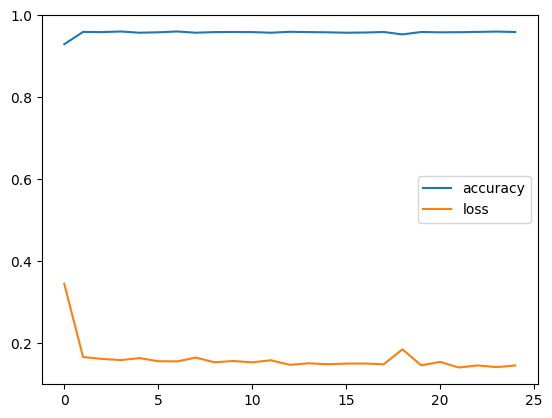

In [24]:
pd.DataFrame(history.history).plot()

In [25]:
model_tf_1.evaluate(X_test,y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9410 - loss: 0.1758  


[0.1747637540102005, 0.9389002323150635]

In [26]:
model_tf_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         2,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,905 (26.98 KB)

 Trainable params: 2,301 (8.99 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,604 (17.99 KB)